# Bayesian classifier

## 1. Install libraries



In [2]:
import os
from bayesML import Bayes
from cifarData import getCifarData



## 2. getCifarData

Use function getCifarData to download Cifar-10 dataset.

In [8]:
path = os.path.dirname(os.path.abspath('')) 
# Get the data
X_train,Y_train, X_test, Y_test = getCifarData(path)


## 3.Use Bayesian classifier to classifie pictures
### 3.1 cifar10_X_times_X_color
To reduce the dimension of our data vectors $x_i$ from 3072-dimensions we rescale the images from 32 × 32
to $n$ x $n$, where $n$ = 1,2,4,8,16 or 32. When you do this separately for each color channel (RGB) every CIFAR-10 image is represented with $n$ values that are the mean values of each color channel, i.e $x_i = x^{(i)}_{3×1} = (m^i_R, m^i_G, m^i_B )^T$ .
### 3.2 Methods for the fit fuction
You can choose between naive and multivariate Bayes classifier. The naive Bayes classifier assumes that features mR, mG and mB are independent and therefore a class specific posterior probability can be computed from 
    
$P(class_1|x) = P (x|class_1)P (class_1) / \sum_j P(x|class_j )P (class_j )$
   
   
In the multivariate bayesian classifier we relax the naive assumption that the
red, green and blue channels are independent. Instead of three 1-dimensional Gaussians we assume a single
3-dimensional Gaussian. Classification becomes

$P(class_1|x) = P(x|class_1)P(class_1) / \sum_j P(x|class_j )P(class_j)$

In [9]:

# Create model
bay = Bayes()
# Lets use naive bayesian and rescale the images to 2x2
bay.fit(X_train, Y_train,2,'naive')
bay.predict(X_test, Y_test, len(X_test))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6443.54it/s]


Predicting accuracy is 0.2454.


In [11]:
# We can get better results to increase the picture size
bay.fit(X_train, Y_train,16,'naive')
bay.predict(X_test, Y_test, len(X_test))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1493.61it/s]


Predicting accuracy is 0.2947.


In [13]:
# Lets use multivariate bayesian and rescale the images to 4x4
# We notice that using multivariate normal distribution fitting the model takes more time
bay.fit(X_train, Y_train,4,'multivariate')
bay.predict(X_test, Y_test, len(X_test))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:49<00:00, 200.18it/s]


Predicting accuracy is 0.3378.


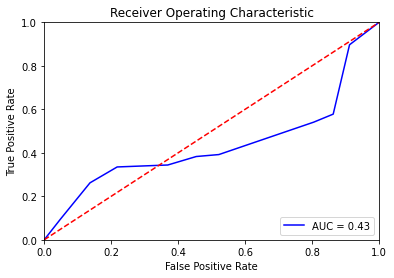

In [14]:
# We can also plot roc curve from the last results
bay.roc()